# Marvel tasks 1 and 2

## Project report

The following is my submission to Marvel with regard to tasks 1 and 2, which require a project and a report on the same. This document contains python code which can be executed along with the corresponding documentation so as to give the reader a better understanding of the project.

### Problem statement

```
Given a data-set of usual wake-up times and usual bed-times of college students, visualize the data and find if there is any relation between wake-up time and bed-time. If there is a relation, develop a model to predict bed-time of a random student, given his/her/their wake-up time. Bonus points for finding extra insights with the data.
```

### Proposed solution
#### Abstract

I shall demonstrate that the sleep time of a student is indeed correlated linearly with their wake-up time. Further, I shall also be using the K-means clustering algorithm to classify the data points into 4 different categories. After this, I shall be depicting a visualization of the mean sleep duration across the engineering branches mentioned in the dataset.

I shall be using the following python libraries to implement the solution:
1. pandas
2. matplotlib
3. numpy
4. scikit-learn

#### Start of project
The first step is to clean up the dataset in order to use it in an efficient manner.

In [1]:
import pandas as pd
pd.set_option('mode.chained_assignment', None)
data_file = pd.read_csv("sleep_data.csv")
print(data_file)

              Timestamp Year. Branch  \
0    6/12/2022 18:46:02   3rd    ECE   
1    6/12/2022 18:57:41   1st    ISE   
2    6/12/2022 18:57:53   1st    ISE   
3    6/12/2022 18:58:03   2nd    ISE   
4    6/12/2022 18:59:31   2nd    ISE   
..                  ...   ...    ...   
149  6/13/2022 11:54:37   1st    EEE   
150  6/13/2022 11:55:10   3rd    ISE   
151  6/13/2022 12:21:04   3rd    CSE   
152  6/13/2022 12:34:08   1st    ISE   
153  6/13/2022 13:34:37   3rd    ECE   

    at what time do you usually go to sleep? (be honest)  \
0                                          10:45:00 PM     
1                                          10:30:00 PM     
2                                          12:00:00 PM     
3                                           1:30:00 AM     
4                                          11:30:00 PM     
..                                                 ...     
149                                        12:00:00 PM     
150                                    

The given dataset had time formatting errors. As can be seen, some data points have sleep time listed as 12:00:00 PM, 11:30:00 AM, etc. We need to clean up the data so as to correct these data points and to convert them into a standard format. The following code achieves this:

In [2]:
from datetime import datetime
new_text = []
pms = ["8:", "9:", "10:", "11:"]
ams = ["12:", "1:", "2:", "3:", "4:", "5:", "6:"]
with open("sleep_data.csv", 'r') as f:
    text = ''.join([i for i in f])
    text = text.split("\n")
    new_text.append(text[0])
    text.remove(text[0])
    for i in text:
        temp = i.split(",")
        x = temp[3]
        for p in pms:
            if x.startswith(p):
                x = x.replace("AM", "PM")
        for a in ams:
            if x.startswith(a):
                x = x.replace("PM", "AM")
        in_time = datetime.strptime(x, "%I:%M:%S %p")
        out_time = datetime.strftime(in_time, "%H:%M")
        temp[3] = out_time
        y = temp[4]
        if y.startswith("12"):
                y = y.replace("AM", "PM")
        in_time = datetime.strptime(y, "%I:%M:%S %p")
        out_time = datetime.strftime(in_time, "%H:%M")
        temp[4] = out_time
        new_text.append(','.join(temp))
    n_f = open("sleep_data_clean.csv", "w")
    n_f.write('\n'.join(new_text))
    n_f.close()

In [3]:
data_file = pd.read_csv("sleep_data_clean.csv")
print(data_file)

              Timestamp Year. Branch  \
0    6/12/2022 18:46:02   3rd    ECE   
1    6/12/2022 18:57:41   1st    ISE   
2    6/12/2022 18:57:53   1st    ISE   
3    6/12/2022 18:58:03   2nd    ISE   
4    6/12/2022 18:59:31   2nd    ISE   
..                  ...   ...    ...   
149  6/13/2022 11:54:37   1st    EEE   
150  6/13/2022 11:55:10   3rd    ISE   
151  6/13/2022 12:21:04   3rd    CSE   
152  6/13/2022 12:34:08   1st    ISE   
153  6/13/2022 13:34:37   3rd    ECE   

    at what time do you usually go to sleep? (be honest)  \
0                                                22:45     
1                                                22:30     
2                                                00:00     
3                                                01:30     
4                                                23:30     
..                                                 ...     
149                                              00:00     
150                                    

Now that we have a clean data set to work with, we proceed to import the required libraries:


In [4]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import numpy as np
from sklearn.cluster import KMeans

In [5]:
data = data_file.iloc[:, [3,4]]
data.columns = ['X', 'Y']

We then read the data from the clean dataset and extract the columns which are of interest to us i.e. the sleep time and the wake-up time. We then label them as 'X' and 'Y' respectively so as to make it easier for us to refer to them.

In [6]:
sleep_time = {
    "21": "0",
    "22": "1",
    "23": "2",
    "00": "3",
    "01": "4",
    "02": "5",
    "03": "6",
    "04": "7",
    "05": "8",
    "06": "9",
    "07": "10",
    "08": "11",
    "09": "12",
}

X = []
X_cluster = []
Y = []
for i in data['X']:
    s = i.split(":")
    X.append(float(sleep_time[s[0]]+"."+s[1]))
    X_cluster.append(float(s[0]+"."+s[1]))

for i in data['Y']:
    s = i.split(":")
    Y.append(float(s[0]+"."+s[1]))

df = pd.DataFrame({'X': X, 'Y': Y})
print(df)

        X     Y
0    1.45  6.15
1    1.30  6.00
2    3.00  6.30
3    4.30  9.00
4    2.30  9.30
..    ...   ...
149  3.00  8.00
150  3.01  7.30
151  3.30  8.30
152  3.30  7.30
153  1.00  6.00

[154 rows x 2 columns]


We create a dictionary to map the sleep time's hour parameter to integers starting from 1 so as to convert the time-based data to interval-type data. We then append the minutes parameter to the result obtained to further obtain a float number that corresponds to the sleep time. We do the mapping only to the sleep time and not to the wake-up time because the wake-up time has an inherent order to it, while the sleep time does not (21:00 occurs earlier than 01:00 in the context of sleep time, whereas 21.00 is not greater than 1.00).

At this point, the observant reader may note that we have two arrays, X and X_cluster. The reason for making two arrays will be clarified in due time.

In [7]:
fit = np.polyfit(df["X"], df["Y"], deg=1)
fit_function = np.poly1d(fit)

print ("Slope : " + str(fit[0]))
print ("Intercept : " + str(fit[1]))

Slope : 0.573981294284648
Intercept : 5.588059761116583


We then apply a linear regression model on the above dataset so as to be able to predict the wake-up time of a student, given their sleep time.

Technically, the function used is a polynomial regression model, but the degree parameter is passed as 1.

In linear regression, we essentially model the relationship between the dependent variable and the independent variable. We do this by estimating the best values for a and b in the equation for a straight line (given a dataset):
![](https://latex.codecogs.com/svg.image?%5Clarge%20y%20=%20ax%20&plus;%20b)

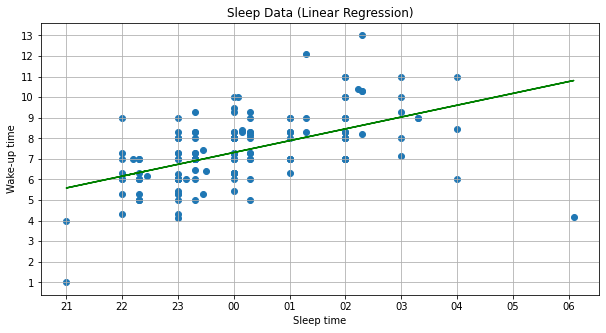

In [8]:
fig1 = plt.figure(0, figsize=(10,5))
ax1 = plt.subplot()
ax1.set(xlabel="Sleep time",
       ylabel="Wake-up time",
       title="Sleep Data (Linear Regression)")

ax1.xaxis.set_major_locator(tck.MultipleLocator(1))
ax1.yaxis.set_major_locator(tck.MultipleLocator(1))
ax1.grid()
plt.scatter(X, Y)
plt.xticks(range(13), list(sleep_time.keys()))
plt.plot(X, fit_function(X), color="green")
plt.show()

The above code generates a graph to visualise the dataset using a scatterplot, and has also plotted the best fit line on the graph.

We shall now see an example of how this model can be used to predict the wake-up time of a student.

In [9]:
random_sleep_time = input("Enter your wake-up time in the format HH:MM > ")
time_array = random_sleep_time.split(":")
y = float(time_array[0] + "." + time_array[1])
x = int((1/fit[0])*(y-fit[1]))
if x < 4:
    result = 21 + x
else:
    result = "0" + str(x-3)
print(f"Prediction of sleep time: {result}:00")

Enter your wake-up time in the format HH:MM > 07:00
Prediction of sleep time: 23:00


We shall now see the classification of the datapoints on the graph using the K-means clustering algorithm. 

K-Means clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. Here, K defines the number of pre-defined clusters that need to be created from the dataset.

![](https://static.javatpoint.com/tutorial/machine-learning/images/k-means-clustering-algorithm-in-machine-learning.png)

The reason for making two arrays is to store the original sleep times separately from the sleep times that have been converted into interval type data. This is because the ordering needs to be preserved to perform linear regression, but K-means clustering works without it. 

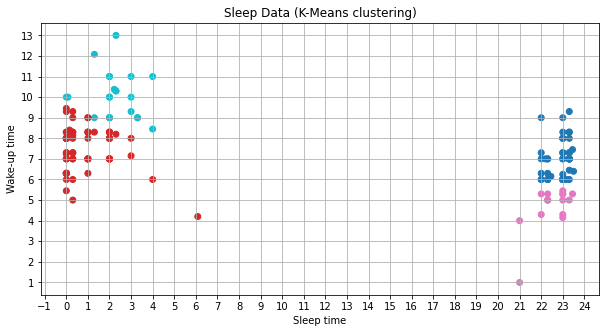

In [10]:
df_cluster = pd.DataFrame({'X': X_cluster, 'Y': Y})
kmeans = KMeans(4)
kmeans.fit(df_cluster)
identified_clusters = kmeans.fit_predict(df_cluster)
data_with_clusters = df_cluster.copy()
data_with_clusters['Clusters'] = identified_clusters 

fig2 = plt.figure(2, figsize=(10,5))
ax2 = plt.subplot()
ax2.xaxis.set_major_locator(tck.MultipleLocator(1))
ax2.yaxis.set_major_locator(tck.MultipleLocator(1))
ax2.grid()
ax2.set(xlabel="Sleep time",
       ylabel="Wake-up time",
       title="Sleep Data (K-Means clustering)")
plt.scatter(data_with_clusters['X'],data_with_clusters['Y'],c=data_with_clusters['Clusters'],cmap='tab10')
plt.show()

In the above graph, we can see 4 distinct groups of students. 

Going clockwise, we have:
1. The students who sleep early and wake up late.
2. The students who sleep late and wake up late.
3. The students who sleep late and wake up early.
4. The students who sleep early and wake up early.

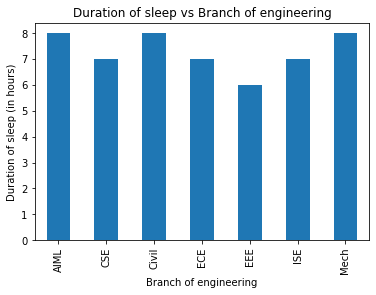

In [11]:
sleep_map_bar = {
    "21": 0,
    "22": 1,
    "23": 2,
    "00": 3,
    "01": 4,
    "02": 5,
    "03": 6,
    "04": 7,
    "05": 8,
    "06": 9,
    "07": 10,
    "08": 11,
    "09": 12,
    "10": 13,
    "11": 14,
    "12": 15,
    "13": 16,
}

data_bar = data_file.iloc[:, [2,3, 4]]
data_bar.columns = ['Branch', 'X', 'Y']
data_bar["X"] = data_bar["X"].apply(lambda x: sleep_map_bar[x.split(":")[0]])
data_bar["Y"] = data_bar["Y"].apply(lambda y: sleep_map_bar[y.split(":")[0]])
data_bar["duration"] = (data_bar["Y"] - data_bar["X"])

data_bar.groupby(['Branch'])["duration"].mean().round(0).plot(kind='bar', 
                                                              title='Duration of sleep vs Branch of engineering')
plt.xlabel('Branch of engineering')
plt.ylabel('Duration of sleep (in hours)')
plt.title
plt.show()

The above graph shows us the mean duration of sleep that the students get across the various branches of engineering mentioned in the dataset.

### Conclusion

Thus, we have seen the correlation between sleep time and wake-up time of the given set of students, how we can group the students on the basis of the given dataset in order to derive insights about their sleeping habits and how the choice of a particular engineering branch has an impact on their duration of sleep.

Key learnings:
- Learning to use the scikit-learn, pandas, matplotlib and numpy libraries.
- Getting to know how to model data given a particular dataset.
- Learning about the different approaches of modelling data.
- Learning about the importance of cleaning up the dataset before doing any modelling task.